In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
x ,y = make_moons(n_samples=100, noise=0.25, random_state=2)

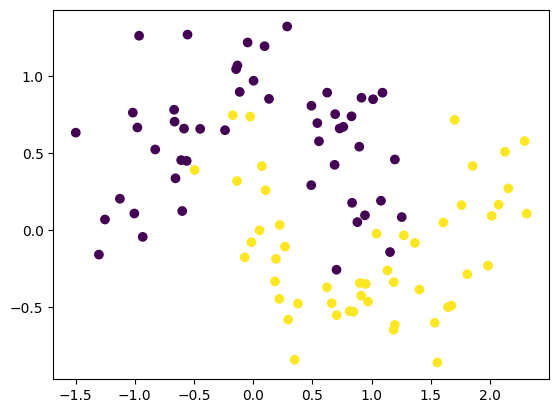

In [43]:
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [51]:
model= Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


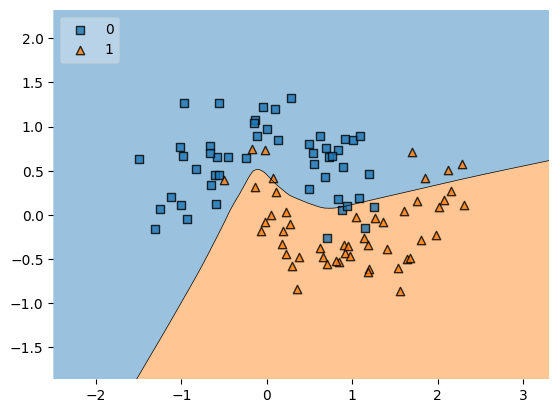

In [52]:
# with out using ragualrization decisin region
plot_decision_regions(x, y, clf = model, legend =2)
plt.show()

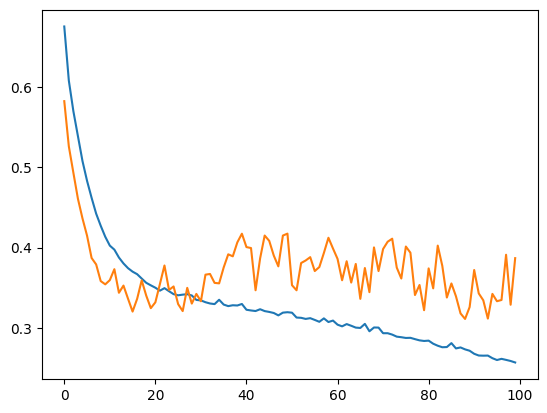

In [53]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.show()

# USING RAGULARIZATION TECHNIQUE

In [54]:
model1= Sequential()
model1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer= tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(64, activation='relu', kernel_regularizer= tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


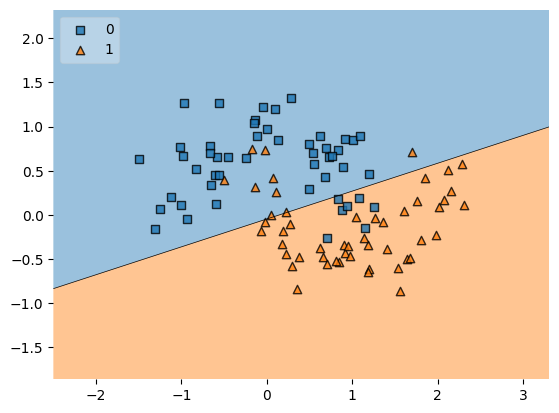

In [55]:
# with out using ragualrization decisin region
plot_decision_regions(x, y, clf = model1, legend =2)
plt.show()

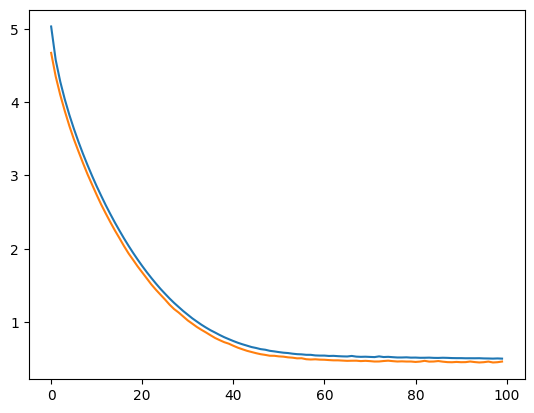

In [56]:
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.show()

# here we can se huge difference between out model and model1 performance